# 4. Data Visualization

-   Visualize the distribution of data.
-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.

In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-06-14 16:25:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolviendo cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Conectando con cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)[169.63.118.104]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 36679680 (35M) [application/octet-stream]
Grabando a: `m4_survey_data.sqlite.1'

m4_survey_data.sqli 100%[===================>]  34,98M   452KB/s    en 79s     

2021-06-14 16:26:26 (453 KB/s) - `m4_survey_data.sqlite.1' guardado [36679680/36679680]



In [30]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite")
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Running SQL Query

In [39]:
QUERY = """
SELECT *
FROM master
"""

df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


List all of the tables

In [6]:
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""

pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


Histogram of `ConvertedComp`

Text(0.5, 1.0, 'Histogram of ConvertedComp')

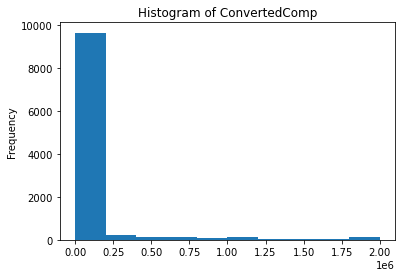

In [8]:
QUERY = """
SELECT *
FROM master
"""


df = pd.read_sql_query(QUERY,conn)

df['ConvertedComp'].plot(kind='hist')
plt.title('Histogram of ConvertedComp')

Boxplot of `Age`

Text(0.5, 1.0, 'Boxplot of Age')

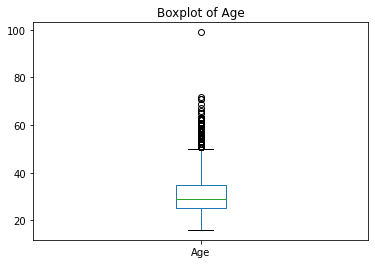

In [9]:
df['Age'].plot(kind='box')
plt.title('Boxplot of Age')

Scatter plot of `Age` and `WorkWeekHrs.`

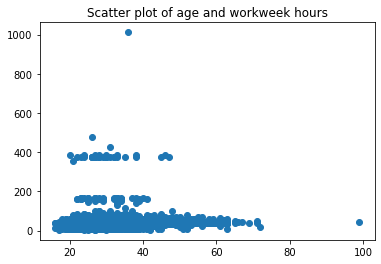

In [11]:
plt.scatter(df['Age'],df['WorkWeekHrs'])
plt.title('Scatter plot of age and workweek hours')
plt.show()

Bubble plot of `WorkWeekHrs` and `CodeRevHrs`

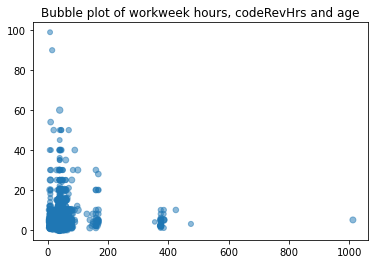

In [12]:
plt.scatter(df['WorkWeekHrs'],df['CodeRevHrs'],s=df['Age'],alpha=0.5)
plt.title('Bubble plot of workweek hours, codeRevHrs and age')
plt.show()

Pie chart of the top 5 databases that respondents wish to learn next year

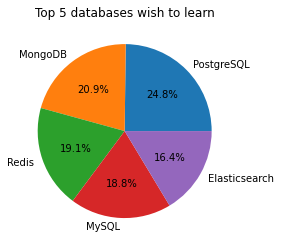

In [58]:
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""

df_db = pd.read_sql_query(QUERY,conn)


df_dbrename=df_db['DatabaseDesireNextYear'].value_counts().rename_axis('Database').reset_index(name='Num')
df_top5=df_dbrename[:5]

plt.pie(df_top5['Num'],labels=df_top5['Database'],autopct='%.1f%%')
plt.title('Top 5 databases wish to learn')
plt.show()

Stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35

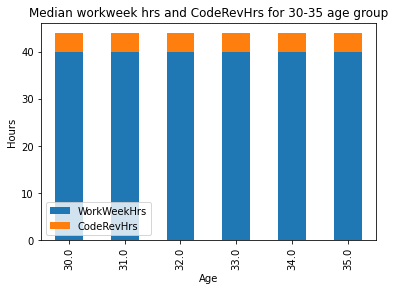

In [53]:
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df_st = pd.read_sql_query(QUERY,conn)

df_stm=df_st.groupby('Age').median()


df_stm.plot(kind='bar',stacked=True)
plt.title('Median workweek hrs and CodeRevHrs for 30-35 age group')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

Median ConvertedComp for all ages from 45 to 60

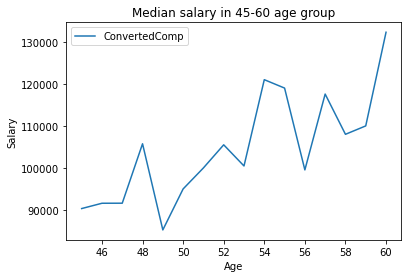

In [55]:
QUERY = """
SELECT Age,ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df_line = pd.read_sql_query(QUERY,conn)

df_al=df_line.groupby('Age').median()

df_al.plot(kind='line')
plt.title('Median salary in 45-60 age group')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

Horizontal bar chart using column `MainBranch.`

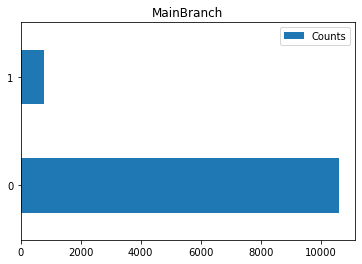

In [59]:
QUERY = """
SELECT MainBranch
FROM master
"""
df_hor = pd.read_sql_query(QUERY,conn)
df_mbrename=df_hor['MainBranch'].value_counts().rename_axis('MainBranch').reset_index(name='Counts')


df_mbrename.plot(kind='barh')
plt.title('MainBranch')
plt.show()

